# Code to Produce some Additional Visualization

## Imports

In [29]:
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt

In [21]:
import ast

df = pd.read_csv('./data/emotions_data.csv')
# Convert 'emotions' and 'emotion_scores' to lists if they are not already
df['emotions'] = df['emotions'].apply(ast.literal_eval)
df['emotion_scores'] = df['emotion_scores'].apply(ast.literal_eval)

# Create 'emotion_label' column
df['emotion_label'] = df.apply(lambda row: row['emotions'][np.argmax(row['emotion_scores'])], axis=1)

source            emotion_label
"metrology news"  Concern          1
                  Optimism         2
01net             Concern          2
                  Optimism         2
10TV              Concern          1
                                  ..
헤럴드경제             Concern          1
헬로디디              Concern          1
                  Excitement       1
헬스경향              Concern          1
＠IT               Optimism         1
Length: 4555, dtype: int64


/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


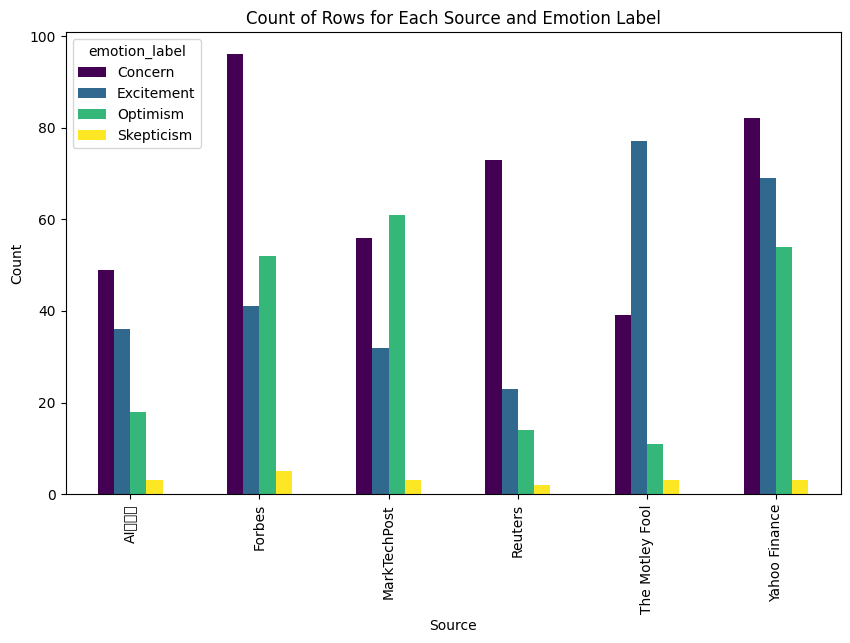

In [9]:
grouped_values = df.groupby(['source', 'emotion_label']).size()
print(grouped_values)

grouped_values = df.groupby(['source', 'emotion_label']).size()
mask = grouped_values.groupby(level=0).transform('sum') > 100

filtered_values = grouped_values[mask]

filtered_values.unstack().plot(kind='bar', stacked=False, colormap='viridis',figsize=(10, 6))
plt.title('Count of Rows for Each Source and Emotion Label')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

In [37]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

month
November     2991
October      2917
August        979
September     935
June          878
July          750
May           550
Name: count, dtype: int64
month      emotion_label
August     Concern           562
           Excitement        184
           Optimism          206
           Skepticism         27
July       Concern           452
           Excitement        134
           Optimism          142
           Skepticism         22
June       Concern           527
           Excitement        173
           Optimism          158
           Skepticism         20
May        Concern           318
           Excitement        103
           Optimism          113
           Skepticism         16
November   Concern          1651
           Excitement        648
           Optimism          630
           Skepticism         62
October    Concern          1756
           Excitement        527
           Optimism          575
           Skepticism         59
September  Concern       

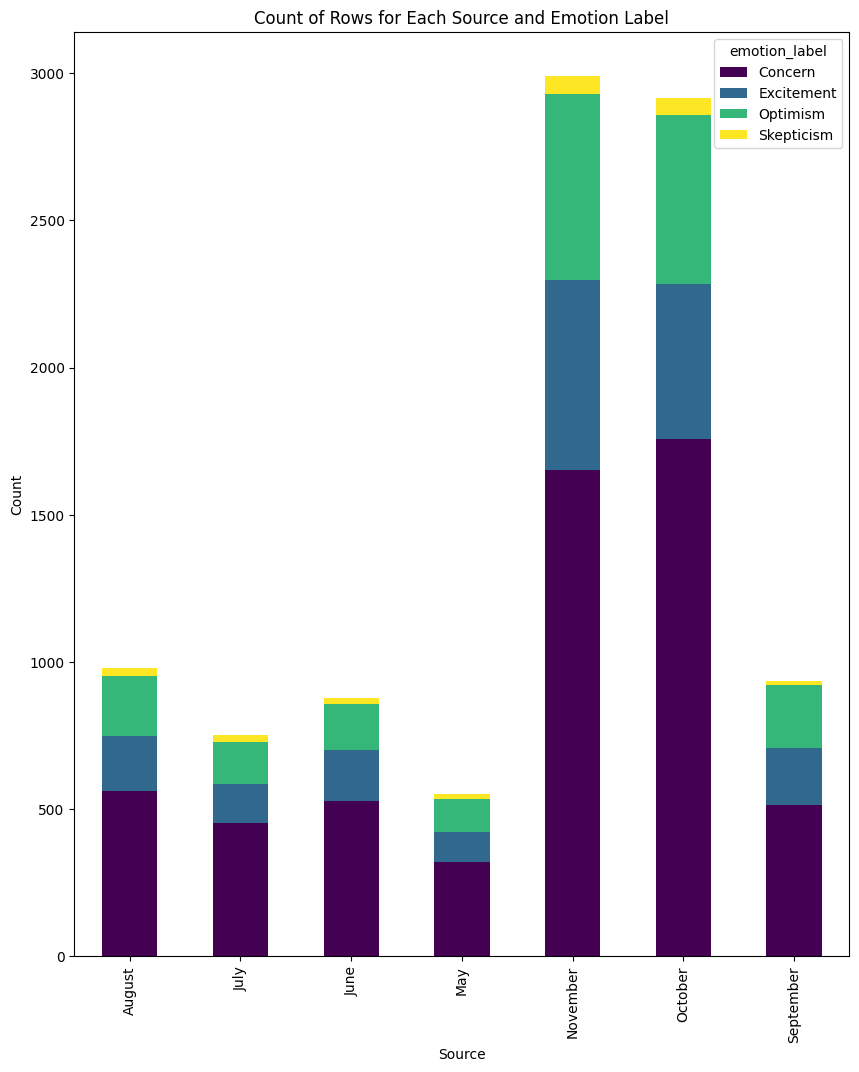

In [42]:
# Map 'month' to string name for month
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])
grouped_values = df.groupby(['month', 'emotion_label']).size()
print(df['month'].value_counts())
print(grouped_values)

grouped_values.unstack().plot(kind='bar', stacked=True, colormap='viridis',figsize=(10, 12))
plt.title('Count of Rows for Each Source and Emotion Label')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

TypeError: unhashable type: 'list'

year
2023    10000
Name: count, dtype: int64
year  emotion_label
2023  Concern          5780
      Excitement       1963
      Optimism         2038
      Skepticism        219
dtype: int64


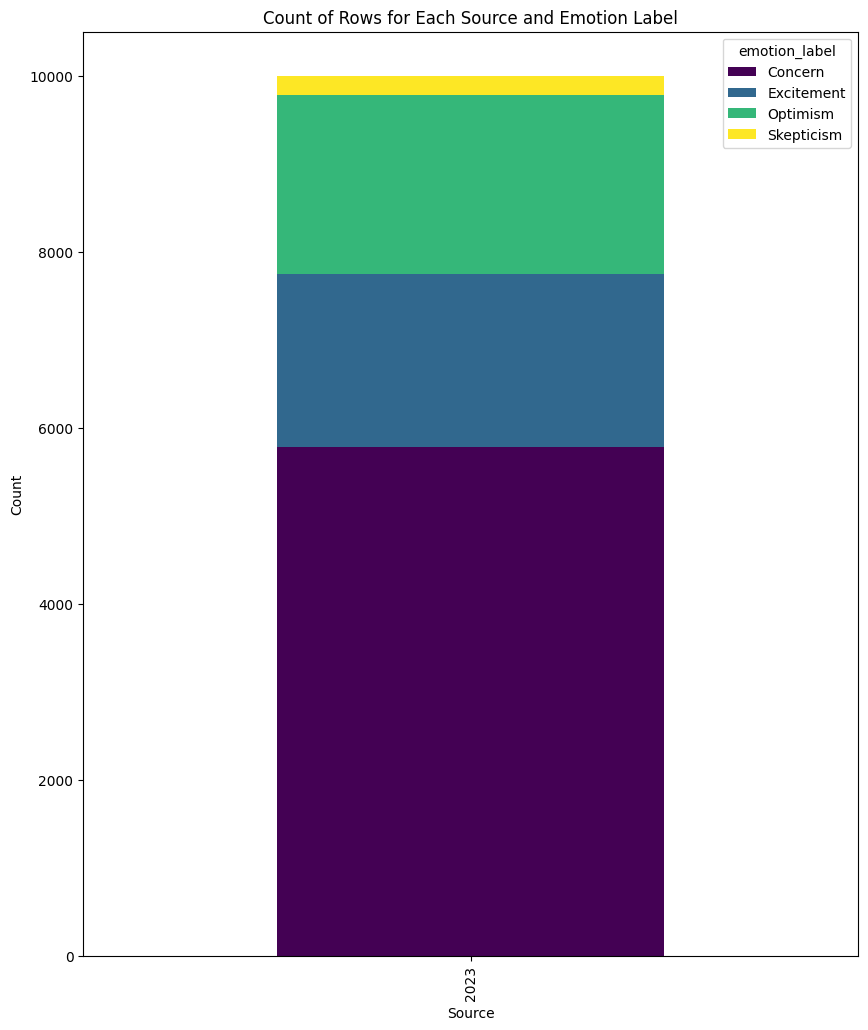

In [27]:
grouped_values = df.groupby(['year', 'emotion_label']).size()
print(df['year'].value_counts())
print(grouped_values)

grouped_values.unstack().plot(kind='bar', stacked=True, colormap='viridis',figsize=(10, 12))
plt.title('Count of Rows for Each Source and Emotion Label')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()